In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("A51.csv", delimiter=";")
df.head()

,Datum,Uhrzeit,Bezeichnung,Intervall,D21Z,D21B,D22Z,D22B,D23Z,D23B,...,TB38Z,TB38B,TB39Z,TB39B,TB41Z,TB41B,ST58Z,ST58B,ST59Z,ST59B
0,01.01.2023,10:11,A 51,1,0,0,2,86,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01.01.2023,10:10,A 51,1,0,0,1,13,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01.01.2023,10:09,A 51,1,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,01.01.2023,10:08,A 51,1,0,0,1,19,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01.01.2023,10:07,A 51,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = df.drop(columns=["Intervall","Bezeichnung"])
# Create a boolean mask
mask = [not col.endswith('B') for col in df.columns]
# Use the mask to filter the DataFrame
df = df.filter(items=df.columns[mask])
df.head()

,Datum,Uhrzeit,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,...,TF39Z,TF41Z,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z
0,01.01.2023,10:11,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,01.01.2023,10:10,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,01.01.2023,10:09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,01.01.2023,10:08,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01.01.2023,10:07,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

df['Time'] = df[['Datum', 'Uhrzeit']].apply(lambda x: ' '.join(x), axis=1)
df['Time'] = pd.to_datetime(df['Time'])

In [7]:
df['Sum'] = df.iloc[:, 1:].sum(axis=1)

C:\Users\engin\AppData\Local\Temp\ipykernel_9588\3163298947.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Sum'] = df.iloc[:, 1:].sum(axis=1)


In [8]:
df = df.drop(columns=["Datum","Uhrzeit"])


df.set_index('Time', inplace=True)

df.head()

,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,D91Z,V92Z,...,TF41Z,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z,Sum
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 10:11:00,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
2023-01-01 10:10:00,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
2023-01-01 10:09:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-01 10:08:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2023-01-01 10:07:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [9]:
df.drop(df.columns.difference(['Time','Sum']), 1, inplace=True)

df = df.resample('H').sum()
df.head()


C:\Users\engin\AppData\Local\Temp\ipykernel_9588\2393930553.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Time','Sum']), 1, inplace=True)


,Sum
Time,
2022-01-01 09:00:00,229
2022-01-01 10:00:00,503
2022-01-01 11:00:00,628
2022-01-01 12:00:00,922
2022-01-01 13:00:00,1187


In [10]:
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df = df[np.abs(z_scores) < threshold]
    return df

In [11]:
df.describe()

,Sum
count,8762.000000
mean,1595.499087
std,2024.364056
min,0.000000
25%,441.000000
50%,1333.500000
75%,1848.000000
max,18777.000000


In [12]:
df = remove_outliers_zscore(df, 'Sum')

In [16]:
df.describe()

,Sum
count,8475.000000
mean,1287.651327
std,1088.833217
min,0.000000
25%,412.500000
50%,1289.000000
75%,1795.000000
max,7668.000000


In [17]:
df.tail()

,Sum
Time,
2023-01-01 06:00:00,91
2023-01-01 07:00:00,93
2023-01-01 08:00:00,95
2023-01-01 09:00:00,112
2023-01-01 10:00:00,34


In [18]:
#Split data into train and test
size = int(len(df) * 0.66)

train= df[0:size]
test = df[size:len(df)]
train.tail()


,Sum
Time,
2022-08-28 07:00:00,225
2022-08-28 08:00:00,375
2022-08-28 09:00:00,653
2022-08-28 10:00:00,815
2022-08-28 11:00:00,973


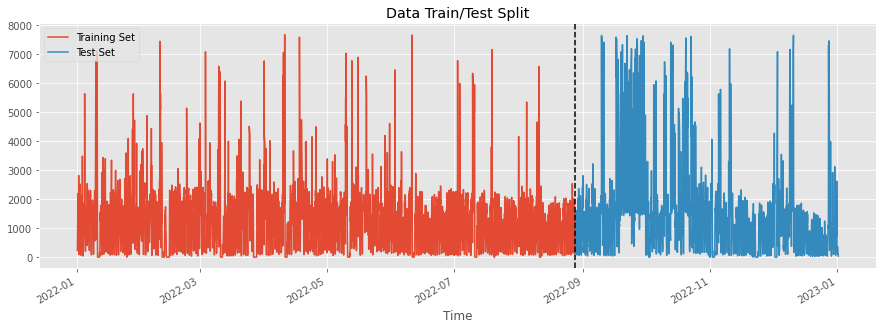

In [19]:
ig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('08-28-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [20]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=4, test_size=24*30, gap=24)
df = df.sort_index()

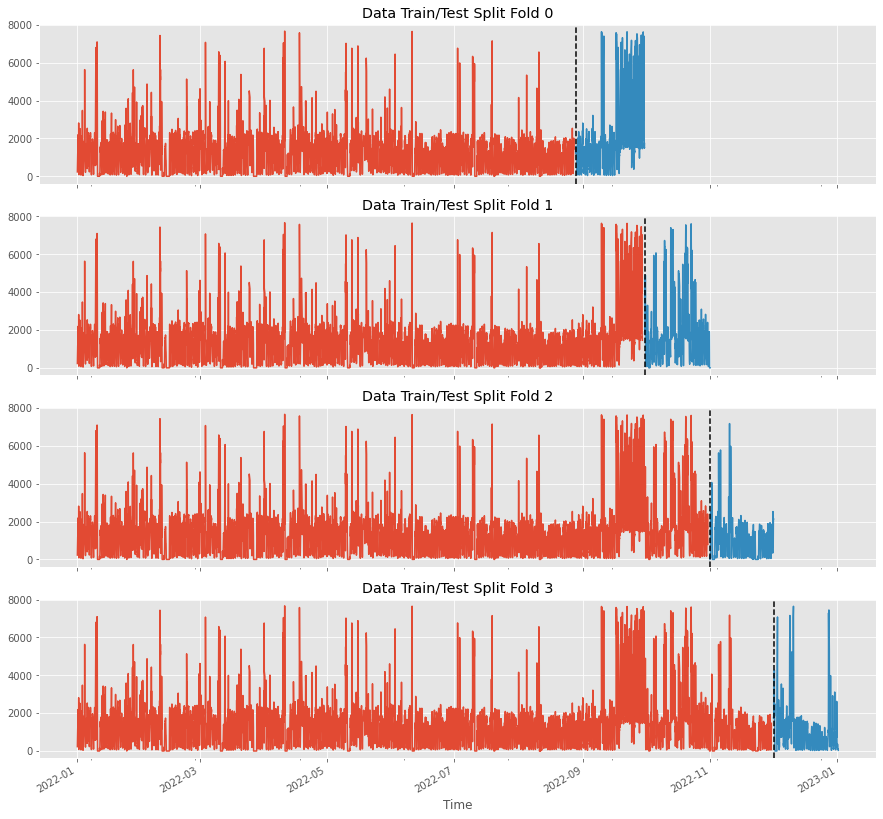

In [21]:
fig, axs = plt.subplots(4, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['Sum'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Sum'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [22]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [23]:
def add_lags(df):
    target_map = df['Sum'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('315 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('336 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('350 days')).map(target_map)
    return df

In [24]:
df = add_lags(df)

In [25]:
df.tail()

,Sum,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Time,,,,,,,,,,,,
2023-01-01 06:00:00,91,6,6,1,1,2023,1,1,52,219.0,227.0,221.0
2023-01-01 07:00:00,93,7,6,1,1,2023,1,1,52,175.0,242.0,279.0
2023-01-01 08:00:00,95,8,6,1,1,2023,1,1,52,459.0,441.0,348.0
2023-01-01 09:00:00,112,9,6,1,1,2023,1,1,52,782.0,713.0,681.0
2023-01-01 10:00:00,34,10,6,1,1,2023,1,1,52,1124.0,1006.0,881.0


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

In [27]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*30, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'Sum'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[14:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1579.25996	validation_1-rmse:1324.96279
[100]	validation_0-rmse:945.01771	validation_1-rmse:674.01475
[200]	validation_0-rmse:812.14893	validation_1-rmse:570.91290
[300]	validation_0-rmse:774.54595	validation_1-rmse:561.67268
[400]	validation_0-rmse:750.92290	validation_1-rmse:559.68756
[500]	validation_0-rmse:734.77329	validation_1-rmse:558.77675
[600]	validation_0-rmse:720.85744	validation_1-rmse:557.73035
[700]	validation_0-rmse:709.39717	validation_1-rmse:557.44713
[800]	validation_0-rmse:699.39593	validation_1-rmse:557.06739
[900]	validation_0-rmse:686.69185	validation_1-rmse:556.56894
[999]	validation_0-rmse:677.52611	validation_1-rmse:555.57478
[14:40:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i

In [28]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 1166.1633
Fold scores:[555.5747911559961, 1851.0271949056348, 1623.6382647568557, 847.1561186818026, 953.4200866820037]


In [29]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'Sum'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=100,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[14:41:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1674.59480
[99]	validation_0-rmse:1066.13925


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [30]:
df.index.max()

Timestamp('2023-01-01 10:00:00')

In [31]:
# Create future dataframe
future = pd.date_range('2023-01-01','2023-01-30', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [34]:
df_and_future.tail()

,Sum,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2023-01-29 20:00:00,NaN,20,6,1,1,2023,29,29,4,5380.0,715.0,0.0,True
2023-01-29 21:00:00,NaN,21,6,1,1,2023,29,29,4,596.0,516.0,0.0,True
2023-01-29 22:00:00,NaN,22,6,1,1,2023,29,29,4,458.0,483.0,0.0,True
2023-01-29 23:00:00,NaN,23,6,1,1,2023,29,29,4,220.0,303.0,0.0,True
2023-01-30 00:00:00,NaN,0,0,1,1,2023,30,30,5,194.0,109.0,0.0,True


In [35]:
future_w_features = df_and_future.query('isFuture').copy()

In [36]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

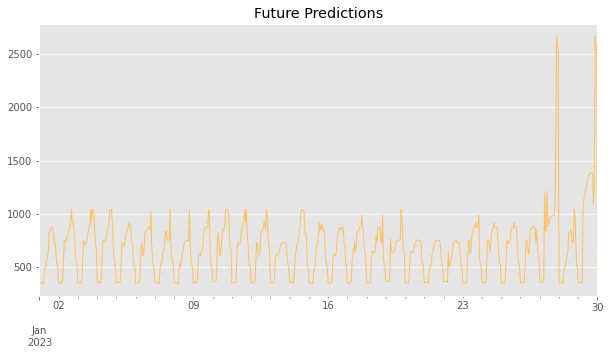

In [37]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

In [38]:
reg.save_model('newmodel.json')

In [39]:
!ls -lh

'ls' is not recognized as an internal or external command,
operable program or batch file.


<AxesSubplot: title={'center': 'Future Predictions'}>

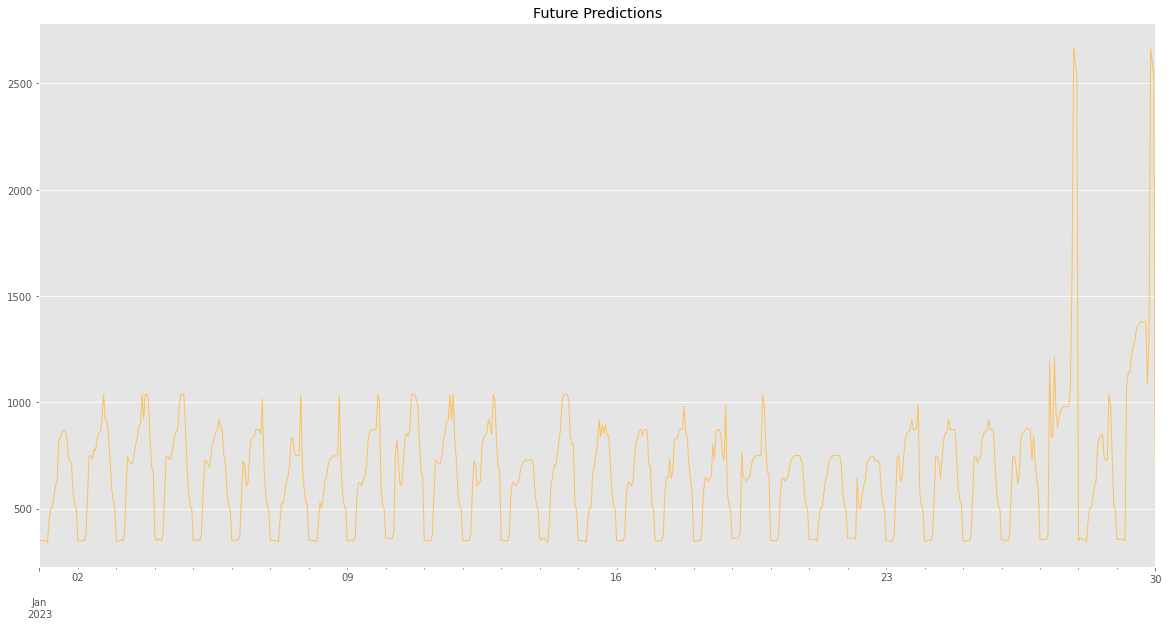

In [40]:
reg_new = xgb.XGBRegressor()
reg_new.load_model('newmodel.json')
future_w_features['pred'] = reg_new.predict(future_w_features[FEATURES])
future_w_features['pred'].plot(figsize=(20, 10),
                               color=color_pal[4],
                               ms=1, lw=1,
                               title='Future Predictions')

In [41]:
future_w_features.tail()

,Sum,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture,pred
2023-01-29 20:00:00,NaN,20,6,1,1,2023,29,29,4,5380.0,715.0,0.0,True,1301.133057
2023-01-29 21:00:00,NaN,21,6,1,1,2023,29,29,4,596.0,516.0,0.0,True,2666.211182
2023-01-29 22:00:00,NaN,22,6,1,1,2023,29,29,4,458.0,483.0,0.0,True,2596.245605
2023-01-29 23:00:00,NaN,23,6,1,1,2023,29,29,4,220.0,303.0,0.0,True,2537.711670
2023-01-30 00:00:00,NaN,0,0,1,1,2023,30,30,5,194.0,109.0,0.0,True,352.302856


In [42]:
future_w_features['pred'].describe()

count     697.000000
mean      669.497192
std       293.768219
min       341.343384
25%       388.569122
50%       677.472656
75%       831.767761
max      2666.211182
Name: pred, dtype: float64

In [43]:
df = pd.read_csv("checkdata.csv", delimiter=";")
df.head()

,Datum,Uhrzeit,Bezeichnung,Intervall,D21Z,D21B,D22Z,D22B,D23Z,D23B,...,TB38Z,TB38B,TB39Z,TB39B,TB41Z,TB41B,ST58Z,ST58B,ST59Z,ST59B
0,31.01.2023,00:00,A 51,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.01.2023,23:59,A 51,1,1,7,1,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30.01.2023,23:58,A 51,1,0,0,2,28,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.01.2023,23:57,A 51,1,0,0,1,38,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.01.2023,23:56,A 51,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df = df.drop(columns=["Intervall","Bezeichnung"])
# Create a boolean mask
mask = [not col.endswith('B') for col in df.columns]
# Use the mask to filter the DataFrame
df = df.filter(items=df.columns[mask])
df.head()

,Datum,Uhrzeit,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,...,TF39Z,TF41Z,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z
0,31.01.2023,00:00,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.01.2023,23:59,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30.01.2023,23:58,0,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.01.2023,23:57,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,30.01.2023,23:56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:

df['Time'] = df[['Datum', 'Uhrzeit']].apply(lambda x: ' '.join(x), axis=1)
df['Time'] = pd.to_datetime(df['Time'])

In [46]:
df['Sum'] = df.iloc[:, 1:].sum(axis=1)

C:\Users\engin\AppData\Local\Temp\ipykernel_9588\3163298947.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Sum'] = df.iloc[:, 1:].sum(axis=1)


In [47]:
df = df.drop(columns=["Datum","Uhrzeit"])


df.set_index('Time', inplace=True)

df.head()

,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,D91Z,V92Z,...,TF41Z,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z,Sum
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-31 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2023-01-30 23:59:00,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2023-01-30 23:58:00,0,2,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2023-01-30 23:57:00,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2023-01-30 23:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.drop(df.columns.difference(['Time','Sum']), 1, inplace=True)

df = df.resample('H').sum()
df.head()


C:\Users\engin\AppData\Local\Temp\ipykernel_9588\2393930553.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Time','Sum']), 1, inplace=True)


,Sum
Time,
2023-01-01 00:00:00,244
2023-01-01 01:00:00,362
2023-01-01 02:00:00,356
2023-01-01 03:00:00,227
2023-01-01 04:00:00,128


In [49]:
df.describe()

,Sum
count,8040.000000
mean,83.536318
std,448.984258
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,11469.000000


In [51]:
df.tail()

,Sum
Time,
2023-12-01 19:00:00,883
2023-12-01 20:00:00,696
2023-12-01 21:00:00,649
2023-12-01 22:00:00,430
2023-12-01 23:00:00,252


In [53]:
df_and_future.tail()

,Sum,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2023-01-29 20:00:00,NaN,20,6,1,1,2023,29,29,4,5380.0,715.0,0.0,True
2023-01-29 21:00:00,NaN,21,6,1,1,2023,29,29,4,596.0,516.0,0.0,True
2023-01-29 22:00:00,NaN,22,6,1,1,2023,29,29,4,458.0,483.0,0.0,True
2023-01-29 23:00:00,NaN,23,6,1,1,2023,29,29,4,220.0,303.0,0.0,True
2023-01-30 00:00:00,NaN,0,0,1,1,2023,30,30,5,194.0,109.0,0.0,True
